In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from util import load_data, fdr, plot_report

%matplotlib inline

In [2]:
x_train, x_test, y_train, y_test = load_data('var_30.csv')
x_train.head()

,ssn_name_count_14,ssn_name_dob_count_14,ssn_lastname_count_14,ssn_firstname_count_14,ssn_dob_count_0_by_30,name_dob_count_0_by_30,fulladdress_homephone_count_14,fulladdress_count_1_by_14,fulladdress_homephone_day_since,ssn_dob_day_since,...,fulladdress_count_0,name_dob_count_3,fulladdress_homephone_count_0_by_14,name_day_since,name_count_14,ssn_dob_count_0_by_14,ssn_lastname_count_0_by_14,ssn_firstname_count_0_by_14,ssn_name_day_since,address_count_1_by_7
650959,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,0.692584,0.685035,...,-0.041351,-0.046415,0.120387,0.902695,-0.159376,0.118004,0.123458,0.123528,0.703958,0.103441
649761,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,0.683090,0.675548,...,-0.041351,-0.046415,0.120387,0.893242,-0.159376,0.118004,0.123458,0.123528,0.694449,0.103441
231120,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-0.759937,-0.766581,...,-0.041351,-0.046415,0.120387,-0.543655,-0.159376,0.118004,0.123458,0.123528,-0.750949,0.103441
402431,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-0.171334,-0.178344,...,-0.041351,-0.046415,0.120387,0.042448,-0.159376,0.118004,0.123458,0.123528,-0.161379,0.103441
462313,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,0.037525,0.030385,...,-0.041351,-0.046415,0.120387,0.250420,-0.159376,0.118004,0.123458,0.123528,0.047823,0.103441


In [3]:
lr = LogisticRegression(max_iter=1000)
params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'class_weight': ['balanced', None]}
clf = GridSearchCV(lr, params, cv=2, refit='FDR', verbose=1,
                   n_jobs=4, scoring={'FDR': fdr, 'ROC': 'roc_auc'})
clf.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  3.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit='FDR', return_train_score=False,
             scoring={'FDR': <function fdr at 0x7f80a8863400>,
                      'ROC': 'roc_auc'},
             verbose=1)

In [4]:
print(f"The best parameters are {clf.best_params_} "
      f"with a score of {clf.best_score_:0.5f}")

The best parameters are {'C': 1, 'class_weight': 'balanced'} with a score of 0.49983


In [5]:
pd.DataFrame(clf.cv_results_).filter(
    items=['mean_fit_time', 'mean_score_time',
           'params', 'mean_test_FDR','std_test_FDR',
           'rank_test_FDR', 'mean_test_ROC', 'std_test_ROC'])

,mean_fit_time,mean_score_time,params,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,9.933704,5.912303,"{'C': 0.001, 'class_weight': 'balanced'}",0.494857,0.005840,5,0.751125,0.001103
1,4.917928,5.940918,"{'C': 0.001, 'class_weight': None}",0.484310,0.009240,10,0.746481,0.002310
2,20.154852,7.005424,"{'C': 0.01, 'class_weight': 'balanced'}",0.498605,0.006102,4,0.749374,0.001623
3,12.068683,5.672211,"{'C': 0.01, 'class_weight': None}",0.486227,0.006625,9,0.747194,0.001894
4,27.914357,6.499211,"{'C': 0.1, 'class_weight': 'balanced'}",0.499564,0.006538,3,0.748640,0.001988
5,24.764148,6.290954,"{'C': 0.1, 'class_weight': None}",0.489191,0.005753,8,0.746965,0.001679
6,62.399063,7.491155,"{'C': 1, 'class_weight': 'balanced'}",0.499826,0.006625,1,0.748372,0.001934
7,44.057592,6.742698,"{'C': 1, 'class_weight': None}",0.490499,0.005666,6,0.746728,0.001625
8,73.369082,6.465397,"{'C': 10, 'class_weight': 'balanced'}",0.499738,0.006538,2,0.748350,0.001927
9,61.320242,5.995795,"{'C': 10, 'class_weight': None}",0.490324,0.005666,7,0.746646,0.001574


FDR: 0.500513522766176

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    197079
           1       0.20      0.52      0.29      2921

    accuracy                           0.96    200000
   macro avg       0.60      0.74      0.63    200000
weighted avg       0.98      0.96      0.97    200000



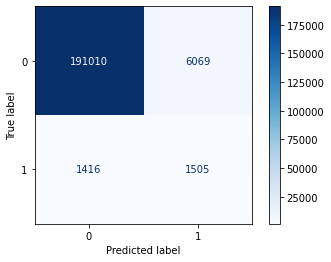

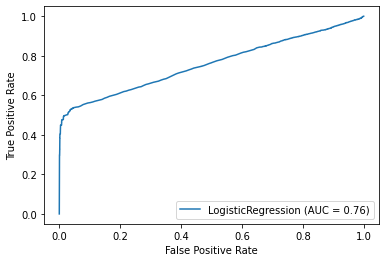

In [6]:
lr = LogisticRegression(max_iter=1000, **clf.best_params_).fit(x_train, y_train)
plot_report(lr, x_test, y_test)